## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2003-0204-23.csv', firstRow=234, lastRow=240)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_280323_S235-240.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=82s and ended at t=506s; mass=44.374050000000004g
This equals a volume of 44.463m; expected was 44.831mL; error is 0.82%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


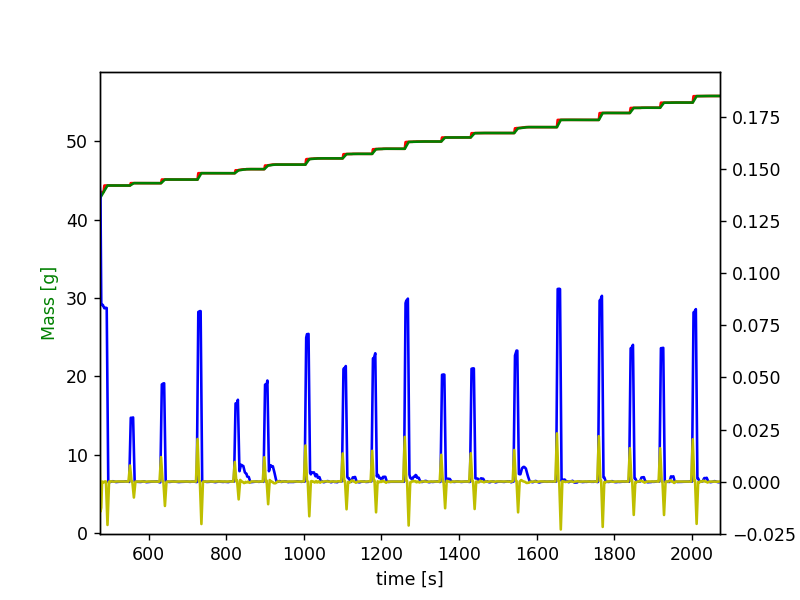

Addition of 0.306g Texapon SB 3 KC detected from 548s to 568s - expected volume = 0.555mL and actual volume = 0.275mL (resulting error is 50.549%)
Addition of 0.468g Texapon SB 3 KC detected from 628s to 648s - expected volume = 0.555mL and actual volume = 0.42mL (resulting error is 24.426%)
Addition of 0.816g Texapon SB 3 KC detected from 722s to 742s - expected volume = 0.989mL and actual volume = 0.735mL (resulting error is 25.714%)
Addition of 0.522g Plantapon LC 7 detected from 818s to 864s - expected volume = 0.551mL and actual volume = 0.492mL (resulting error is 10.565%)
Addition of 0.588g Plantapon LC 7 detected from 894s to 932s - expected volume = 0.551mL and actual volume = 0.554mL (resulting error is 0.599%)
Addition of 0.797g Plantacare 818 detected from 1000s to 1046s - expected volume = 0.889mL and actual volume = 0.727mL (resulting error is 18.162%)
Addition of 0.583g Dehyton MC detected from 1096s to 1138s - expected volume = 0.565mL and actual volume = 0.538mL (resul

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


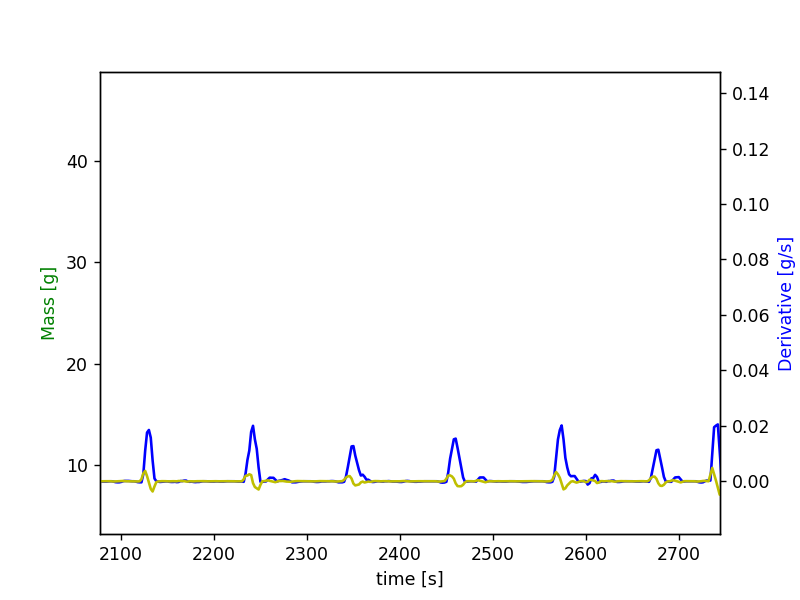

Addition of 0.145g Luviquat Excellence detected from 2120s to 2140s - expected volume = 0.152mL and actual volume = 0.131mL (resulting error is 13.905%)
Addition of 0.191g Luviquat Excellence detected from 2230s to 2266s - expected volume = 0.168mL and actual volume = 0.172mL (resulting error is 2.419%)
Addition of 0.134g Luviquat Excellence detected from 2338s to 2366s - expected volume = 0.118mL and actual volume = 0.121mL (resulting error is 2.385%)
Addition of 0.157g Luviquat Excellence detected from 2448s to 2472s - expected volume = 0.148mL and actual volume = 0.142mL (resulting error is 4.04%)
Addition of 0.206g Luviquat Excellence detected from 2484s to 2594s - expected volume = 0.184mL and actual volume = 0.186mL (resulting error is 1.232%)
Erroneously detected peak from 2602s to 2618s - but detected mass change was smaller than defined minimum of 0.01 g
Addition of 0.101g Luviquat Excellence detected from 2668s to 2688s - expected volume = 0.094mL and actual volume = 0.092mL 

In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


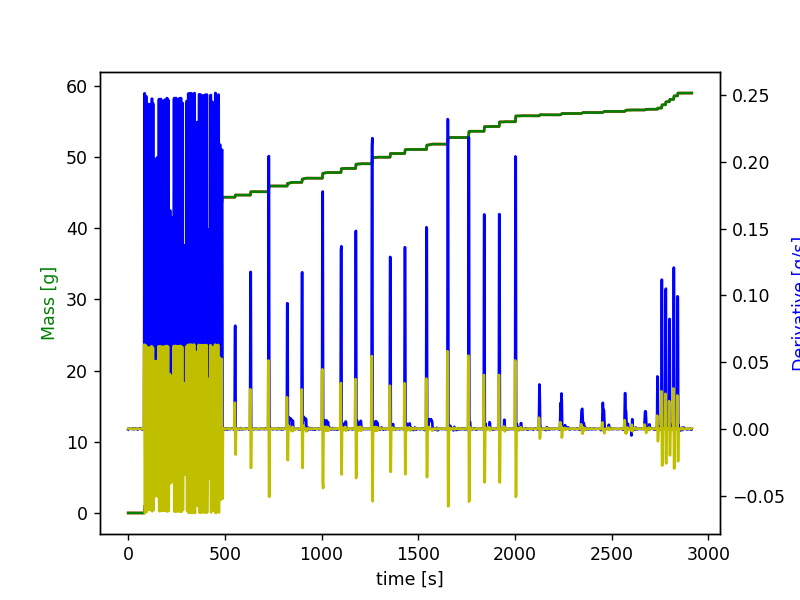

Addition of 0.165g Arlypon F detected from 2732s to 2744s - expected volume = 0.183mL and actual volume = 0.187mL (resulting error is 2.174%)
Addition of 0.451g Arlypon F detected from 2754s to 2766s - expected volume = 0.501mL and actual volume = 0.514mL (resulting error is 2.733%)
Addition of 0.425g Arlypon F detected from 2774s to 2786s - expected volume = 0.46mL and actual volume = 0.481mL (resulting error is 4.68%)
Addition of 0.341g Arlypon F detected from 2794s to 2806s - expected volume = 0.36mL and actual volume = 0.388mL (resulting error is 7.729%)
Addition of 0.489g Arlypon F detected from 2816s to 2828s - expected volume = 0.527mL and actual volume = 0.558mL (resulting error is 5.965%)
Addition of 0.404g Arlypon F detected from 2836s to 2848s - expected volume = 0.426mL and actual volume = 0.463mL (resulting error is 8.737%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_280323_S235-S240.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_3712\2090646777.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
234,235.0,0.000000,0.0,11.08065,0.000000,0.0,0.000000,0.000000,0.000000,9.276475,0.0,0.000000,0.0,1.452725,0.0,0.0,0.0,1.642428,0.0
235,236.0,8.018364,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,9.223346,0.0,1.973767,0.0,0.0,0.0,4.672803,0.0
236,237.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,10.785005,0.000000,0.000000,0.0,13.182330,0.0,1.321040,0.0,0.0,0.0,4.185961,0.0
237,238.0,0.000000,0.0,0.00000,7.995989,0.0,0.000000,0.000000,0.000000,0.000000,0.0,8.475487,0.0,1.578684,0.0,0.0,0.0,3.425706,0.0
238,239.0,0.000000,0.0,0.00000,0.000000,0.0,12.478618,0.000000,7.615131,0.000000,0.0,0.000000,0.0,2.070534,0.0,0.0,0.0,4.921926,0.0
239,240.0,8.218284,0.0,0.00000,0.000000,0.0,9.353784,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.016716,0.0,0.0,0.0,4.071896,0.0
